This notebook is to explore and implement Latent Dirichlet Allocation. <hr>

> Things to consider doing to improve results: plot distribution of words/lemmas in corpus and remove head and tail of distribution.

In [3]:
import pandas as pd
import gensim.corpora as corpora
from gensim.models.ldamodel import LdaModel
from pprint import pprint
import spacy
import matplotlib.pyplot as plt
from gensim.models import CoherenceModel
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis

In [4]:
def get_corpus(data, min_len=3):
    # Create a Dictionary: a mapping between words and their integer IDs
    id2word = corpora.Dictionary(data)
    
    # Remove tokens of 1 or 2 letters
    del_ids = [k for k,v in id2word.items() if len(v)<min_len]
    id2word.filter_tokens(bad_ids=del_ids)
    
    # Create a corpus: a list of documents represented as a BoW
    corpus = [id2word.doc2bow(text) for text in data]
    
    return id2word, corpus

In [16]:
def get_best_model(corpus, id2word, title, language, plot=True, save_plot=True):
    coh_scores = []
    for num_topics in range(1, 11):
        lda_model = LdaModel(
            corpus=corpus, 
            id2word=id2word, 
            num_topics=num_topics, 
            # distributed=True,
            passes=50, 
            update_every=1,
            alpha='auto', 
            eta=None, 
            decay=0.5,
            eval_every=10,
            iterations=50, 
            per_word_topics=True)
        
        coherence_model_lda = CoherenceModel(
            model=lda_model, 
            texts=data, 
            dictionary=id2word, 
            coherence='c_v')
        
        coherence_lda = coherence_model_lda.get_coherence()
        coh_scores.append(coherence_lda)
        if coherence_lda == max(coh_scores):
            best_lda = lda_model

    if plot:
        fig, ax = plt.subplots(1, 1)
        ax.plot(range(1, 11), coh_scores, marker='o', linestyle='--')
        ax.title.set_text(title)
        ax.set_ylabel("Coherence score")
        ax.set_xlabel('Number of topics')
        ax.grid(True)
    if save_plot:
        ax.get_figure().savefig("figures/LDA_coh_"+language, bbox_inches="tight")
        
    return best_lda 

<hr>

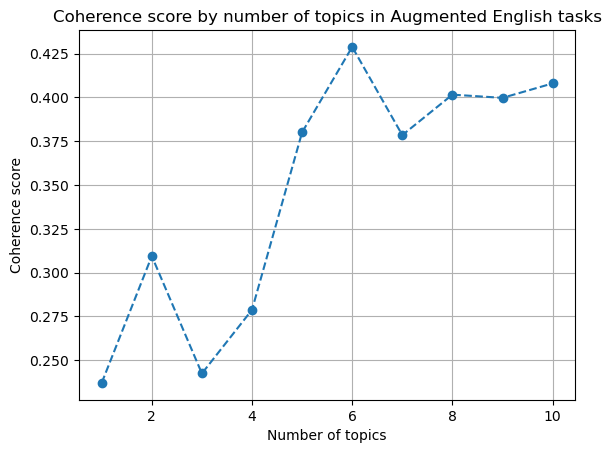

In [12]:
df = pd.read_csv("data/final_tasks_EN.csv")
df.dropna(subset=["description"], inplace=True)
data = df["description"].str.split().to_list() 
title = "Coherence score by number of topics in Augmented English tasks" 

id2word, corpus = get_corpus(data)

lda_model = get_best_model(corpus, id2word, title=title, language="EN", save_plot=False)

In [13]:
lda_model.print_topics() 

[(0,
  '0.025*"luke" + 0.020*"sherlock" + 0.019*"abrihim" + 0.018*"cafe" + 0.016*"like" + 0.012*"offic" + 0.012*"park" + 0.011*"polic" + 0.010*"look" + 0.010*"live"'),
 (1,
  '0.040*"like" + 0.021*"name" + 0.019*"rise" + 0.010*"societi" + 0.010*"mean" + 0.010*"bear" + 0.010*"woman" + 0.009*"whole" + 0.008*"great" + 0.008*"may"'),
 (2,
  '0.017*"ship" + 0.016*"lifeboat" + 0.013*"mine" + 0.012*"could" + 0.012*"peopl" + 0.012*"one" + 0.010*"billi" + 0.009*"know" + 0.009*"crew" + 0.009*"titan"'),
 (3,
  '0.020*"chri" + 0.013*"say" + 0.010*"think" + 0.009*"gun" + 0.009*"get" + 0.007*"like" + 0.007*"move" + 0.007*"find" + 0.007*"gordi" + 0.007*"realli"'),
 (4,
  '0.015*"oil" + 0.013*"make" + 0.012*"ship" + 0.011*"ice" + 0.010*"use" + 0.008*"time" + 0.008*"water" + 0.008*"energi" + 0.007*"peopl" + 0.007*"year"'),
 (5,
  '0.024*"dora" + 0.023*"say" + 0.019*"luke" + 0.018*"gwen" + 0.014*"see" + 0.012*"get" + 0.010*"phone" + 0.010*"chef" + 0.009*"look" + 0.009*"want"')]

In [14]:
# Visualization 
pyLDAvis.enable_notebook()
vis = gensimvis.prepare(lda_model, corpus, id2word) 
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
1     -0.339486  0.006867       1        1  23.791291
4      0.038609 -0.159208       2        1  22.806828
3      0.078277 -0.077764       3        1  18.571577
5      0.108645  0.087356       4        1  15.695448
2      0.065034 -0.118504       5        1  13.128019
0      0.048922  0.261254       6        1   6.006837, topic_info=      Term         Freq        Total Category  logprob  loglift
2248  luke   823.000000   823.000000  Default  30.0000  30.0000
2516  dora   673.000000   673.000000  Default  29.0000  29.0000
639   chri   693.000000   693.000000  Default  28.0000  28.0000
1120  rise   891.000000   891.000000  Default  27.0000  27.0000
302   like  2703.000000  2703.000000  Default  26.0000  26.0000
...    ...          ...          ...      ...      ...      ...
72     see    88.310565  1279.905518   Topic6  -4.8195   0.1386
293    get    86.582338  1491.761245   Topic6  -4.8392  -0.0343
299    day    80.548471   751.999073   Topic6  -4.9115   0.5784
513   time    74.869016   698.105914   Topic6  -4.9846   0.5796
277    man    71.720536   987.826901   Topic6  -5.0275   0.1895

[394 rows x 6 columns], token_table=      Topic      Freq       Term
term                            
878       3  0.998063       abbi
2234      6  0.998112    abrihim
2258      4  0.118678      accid
2258      5  0.873901      accid
1045      2  0.991036     affect
...     ...       ...        ...
857       5  0.124348       year
857       6  0.005717       year
156       5  0.932834  yesterday
156       6  0.066631  yesterday
1569      1  0.996431       zeze

[696 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 5, 4, 6, 3, 1])

<hr>

In [17]:
df = pd.read_csv("data/final_tasks_DE.csv")
df.dropna(subset=["description"], inplace=True)
data = df["description"].str.split().to_list() 
title = "Coherence score by number of topics in Augmented German tasks" 

id2word, corpus = get_corpus(data)

lda_model = get_best_model(corpus, id2word, title=title, language="DE")

In [9]:
lda_model.print_topics() 

[(0,
  '0.036*"elektrisch" + 0.028*"widerstand" + 0.015*"strom" + 0.014*"stromstark" + 0.011*"spannung" + 0.010*"elektron" + 0.009*"drahen" + 0.008*"groß" + 0.008*"bauteil" + 0.007*"einheit"'),
 (1,
  '0.032*"infinitiv" + 0.024*"satz" + 0.023*"temperatur" + 0.019*"schreib" + 0.018*"zubird" + 0.015*"warm" + 0.014*"komma" + 0.013*"denk" + 0.011*"gehen" + 0.010*"korper"'),
 (2,
  '0.021*"magnet" + 0.015*"bild" + 0.014*"kraft" + 0.011*"groß" + 0.009*"stricknadel" + 0.009*"eben" + 0.008*"sudpol" + 0.008*"klein" + 0.007*"gegenstand" + 0.007*"zahnrad"'),
 (3,
  '0.103*"schreib" + 0.072*"satz" + 0.033*"passiv" + 0.030*"prasen" + 0.030*"englisch" + 0.028*"hideaway" + 0.027*"hideout" + 0.027*"horst" + 0.022*"lair" + 0.016*"prateritum"'),
 (4,
  '0.044*"geschwindigkeit" + 0.024*"zeit" + 0.022*"fur" + 0.017*"bewegung" + 0.016*"auto" + 0.011*"pass" + 0.009*"immer" + 0.009*"beschleunigen" + 0.008*"formel" + 0.008*"sekund"'),
 (5,
  '0.026*"antwort" + 0.023*"satz" + 0.014*"fur" + 0.012*"bitt" + 0.012

In [10]:
# Visualization 
pyLDAvis.enable_notebook()
vis = gensimvis.prepare(lda_model, corpus, id2word) 
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
3     -0.261007 -0.200808       1        1  13.710026
2      0.163137 -0.156383       2        1  12.000196
5     -0.042232  0.071094       3        1  11.476887
8      0.057624  0.048468       4        1  10.940851
9     -0.241360  0.187038       5        1  10.791843
4      0.107100 -0.002403       6        1   9.680059
1     -0.083578 -0.060335       7        1   8.623378
0      0.127661  0.168498       8        1   8.363953
7      0.108811 -0.096088       9        1   7.264721
6      0.063844  0.040919      10        1   7.148087, topic_info=              Term         Freq        Total Category  logprob  loglift
1125       schreib  3578.000000  3578.000000  Default  30.0000  30.0000
339           satz  3164.000000  3164.000000  Default  29.0000  29.0000
7601  massachusett  1151.000000  1151.000000  Default  28.0000  28.0000
7609      institut  1105.000000  1105.000000  Default  27.0000  27.0000
7602     technolog  1100.000000  1100.000000  Default  26.0000  26.0000
...            ...          ...          ...      ...      ...      ...
3535    bezeichnen    68.848382   203.420861  Topic10  -5.3455   1.5550
331           groß    91.814745   873.162381  Topic10  -5.0576   0.3860
209           konn    76.885471   506.132030  Topic10  -5.2351   0.7538
394            end    66.440702   212.689284  Topic10  -5.3811   1.4748
43           unten    65.598025   290.856430  Topic10  -5.3938   1.1490

[600 rows x 6 columns], token_table=      Topic      Freq        Term
term                             
3343      7  0.984330     abgeben
6002      3  0.987366     abholen
4303      5  0.254373     absolut
4303      7  0.741315     absolut
4244      1  0.065961     abstand
...     ...       ...         ...
462       6  0.055105        zwei
462       7  0.113583        zwei
462       9  0.006748        zwei
462      10  0.037111        zwei
4524     10  0.972484  zweiseitig

[1264 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[4, 3, 6, 9, 10, 5, 2, 1, 8, 7])

Functions that come with gensim LDAModel: <br>
- get_document_topics(bow[, ...]) 	Return topic distribution for the given document bow, as a list of (topic_id, topic_probability) 2-tuples.<br>
- get_term_topics(word_id[, minimum_probability]) 	Returns most likely topics for a particular word in vocab.<br>
- get_topic_terms(topicid[, topn]) 	Return a list of (word_id, probability) 2-tuples for the most probable words in topic topicid. <br>
- show_topic(topicid[, topn]) Return a list of (word, probability) 2-tuples for the most probable words in topic topicid.<br>
- top_topics(corpus[, num_words]) 	Calculate the Umass topic coherence for each topic.<br>
  https://tedboy.github.io/nlps/generated/generated/gensim.models.LdaModel.html                                             